Importing all the important libraries


In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Setting the directory paths for training and testing datasets
## Note: Update the paths for the train and test datasets accordingly
train_data_path = pathlib.Path("Train")
test_data_path = pathlib.Path("Test")


In [3]:
# Counting the number of images in the training and testing datasets
train_image_count = len(list(train_data_path.glob('*/*.jpg')))
print(f"Number of training images: {train_image_count}")

test_image_count = len(list(test_data_path.glob('*/*.jpg')))
print(f"Number of testing images: {test_image_count}")


Number of training images: 2239
Number of testing images: 118


In [4]:
# Load images from disk using Keras' image_dataset_from_directory utility

# Set parameters for loading the datasets


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
# Create training dataset from directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),  # Resize images to the specified height and width
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Create validation dataset from directory
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),  # Resize images to the specified height and width
    batch_size=batch_size
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Retrieve and store the class names for skin cancer from the training dataset
class_names = train_ds.class_names
print("Classes of skin cancer:", class_names)


Classes of skin cancer: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']



Memory updated
Got it! Here’s a clearer rewrite of your original task:

Visualize the Data:
Create a code snippet to visualize one instance from each of the nine classes present in the dataset.

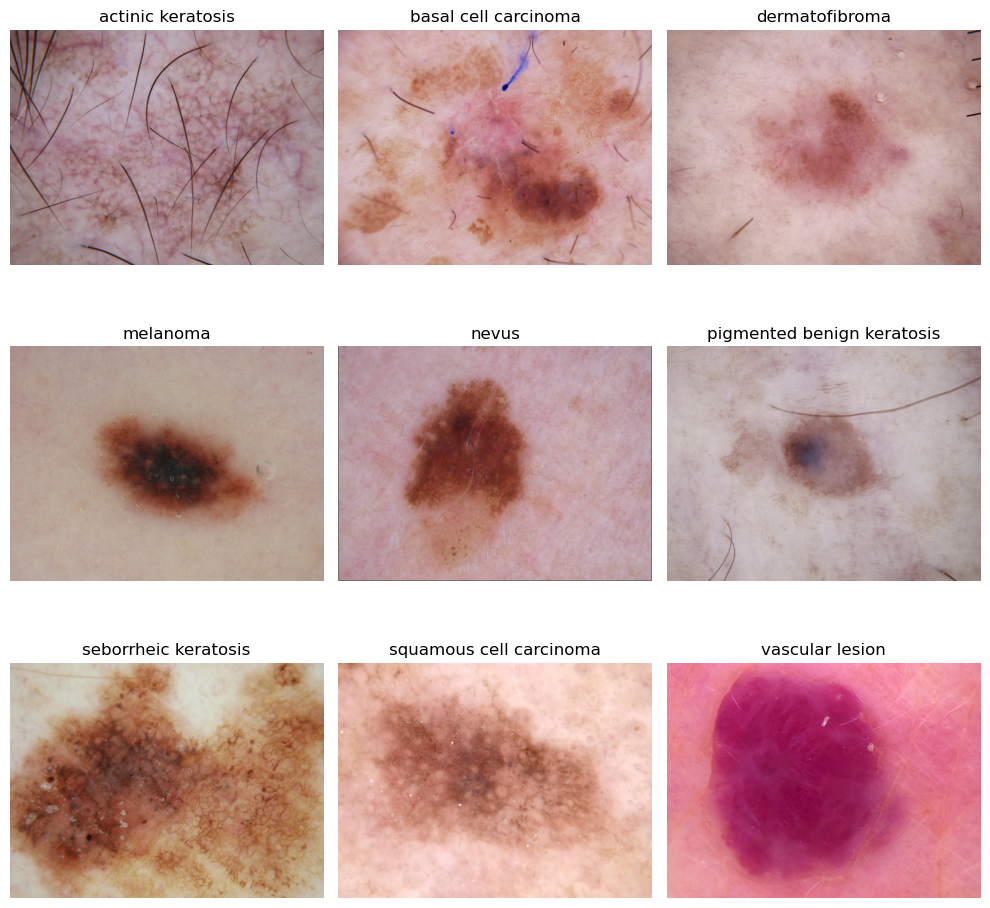

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for visualization
plt.figure(figsize=(10, 10))

# Loop through the first nine classes
for i in range(9): 
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid for the subplots
    image_path = str(list(train_data_path.glob(class_names[i] + '/*.jpg'))[1])  # Get the path of an image in the class
    image = plt.imread(image_path)  # Read the image
    plt.title(class_names[i])  # Set the title to the class name
    plt.imshow(image)  # Display the image
    plt.axis('off')  # Turn off the axis

plt.tight_layout()  # Adjust the layout
plt.show()  # Show the plot


Here’s a clearer rewrite of your description:

The `image_batch` is a tensor with the shape **(32, 180, 180, 3)**, representing a batch of 32 images, each with dimensions 180x180 pixels and 3 color channels (RGB). The `label_batch` is a tensor with the shape **(32,)**, containing the corresponding labels for these 32 images.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Optimize the training dataset by caching, shuffling, and prefetching
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Optimize the validation dataset by caching and prefetching
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Here’s a clearer rewrite of your task description for creating a CNN model:

**Create the Model:**  
Develop a CNN model that accurately detects the nine classes present in the dataset. Use `layers.experimental.preprocessing.Rescaling` to normalize the pixel values to a range of **(0, 1)**. Since the RGB channel values are originally in the range **[0, 255]**, standardizing them to **[0, 1]** is beneficial for neural network training.

In [11]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from keras.models import Sequential
from keras.layers import Rescaling  # Import Rescaling directly

# Define the number of output classes
num_classes = 9

# Initialize the CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Use Input layer to define input shape
    Rescaling(1./255),  # Normalize pixel values to the range [0, 1]
])

# Add convolutional layers with ReLU activation and max pooling
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout for regularization
model.add(Dropout(0.25))

# Flatten the output and add a dense layer with softmax activation
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))

Compile the Model:
Choose an appropriate optimizer and loss function for training the model, and then compile it.

In [12]:
# Compile the model with an optimizer and loss function
model.compile(optimizer='adam',  # Using Adam optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Suitable loss function for multi-class classification
              metrics=['accuracy'])  # Track accuracy as a performance metric

# View the summary of the model layers
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 45, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │        69,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,129 (1.06 MB)

 Trainable params: 277,129 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

Train the model


In [13]:
# Set the number of training epochs
epochs = 30

# Train the model using the training dataset and validate with the validation dataset
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs  # Number of epochs to train
)

Epoch 1/30


C:\Users\nithkuma\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 309ms/step - accuracy: 0.1813 - loss: 2.0729 - val_accuracy: 0.2058 - val_loss: 2.0417
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 270ms/step - accuracy: 0.1967 - loss: 2.0403 - val_accuracy: 0.2058 - val_loss: 2.0312
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - accuracy: 0.1973 - loss: 2.0279 - val_accuracy: 0.2371 - val_loss: 1.9871
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 306ms/step - accuracy: 0.2520 - loss: 1.9512 - val_accuracy: 0.2170 - val_loss: 1.9891
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 304ms/step - accuracy: 0.2342 - loss: 1.9686 - val_accuracy: 0.2506 - val_loss: 1.9672
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - accuracy: 0.2530 - loss: 1.9554 - val_accuracy: 0.2371 - val_loss: 1.9837
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 291ms/step - accuracy: 0.2519 - loss: 1.9569 - val_accuracy: 0.2349 - val_loss: 2.0262
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 309ms/step - accuracy: 0.2360 - loss: 1.9345 - val_accuracy: 0.290

Visualizing training results


Text(0.5, 1.0, 'Training and Validation Loss')

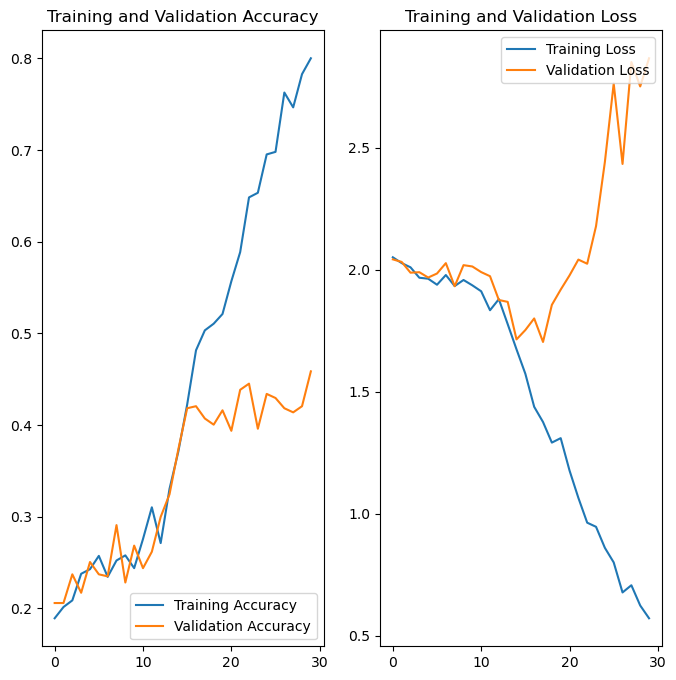

In [14]:
import matplotlib.pyplot as plt

# Extract accuracy and loss metrics from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs
epochs_range = range(epochs)

# Create a figure for plotting
plt.figure(figsize=(8, 8))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')  # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # Plot validation accuracy
plt.legend(loc='lower right')  # Legend location
plt.title('Training and Validation Accuracy')  # Title for accuracy plot

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')  # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')  # Plot validation loss
plt.legend(loc='upper right')  # Legend location
plt.title('Training and Validation Loss')  # Title for loss plot

# Show the


Findings on the First Base Model
After fitting the model, the following observations can be made:

Overfitting Evidence: The model appears to be overfitting, as indicated by the noticeable difference in loss values between the training and validation datasets around the 10th to 11th epoch.

Accuracy Levels: The model achieves an accuracy of approximately 75-80%. This suggests that while there are enough features for the model to learn patterns, it may not be generalizing well to unseen data.

Conclusion on Overfitting and Underfitting: It is important to note that it is still early in the training process to draw definitive conclusions about overfitting or underfitting. Further analysis and additional training may be required to better assess the model's performance.

In [15]:
from keras import layers

# Define the data augmentation strategy
data_augmentation = keras.Sequential([
    # Randomly flip images horizontally and vertically
    layers.RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    
    # Randomly rotate images by up to 20%
    layers.RandomRotation(0.2, fill_mode='reflect'),
    
    # Randomly zoom images by a height and width factor between 20% and 30%
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


C:\Users\nithkuma\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


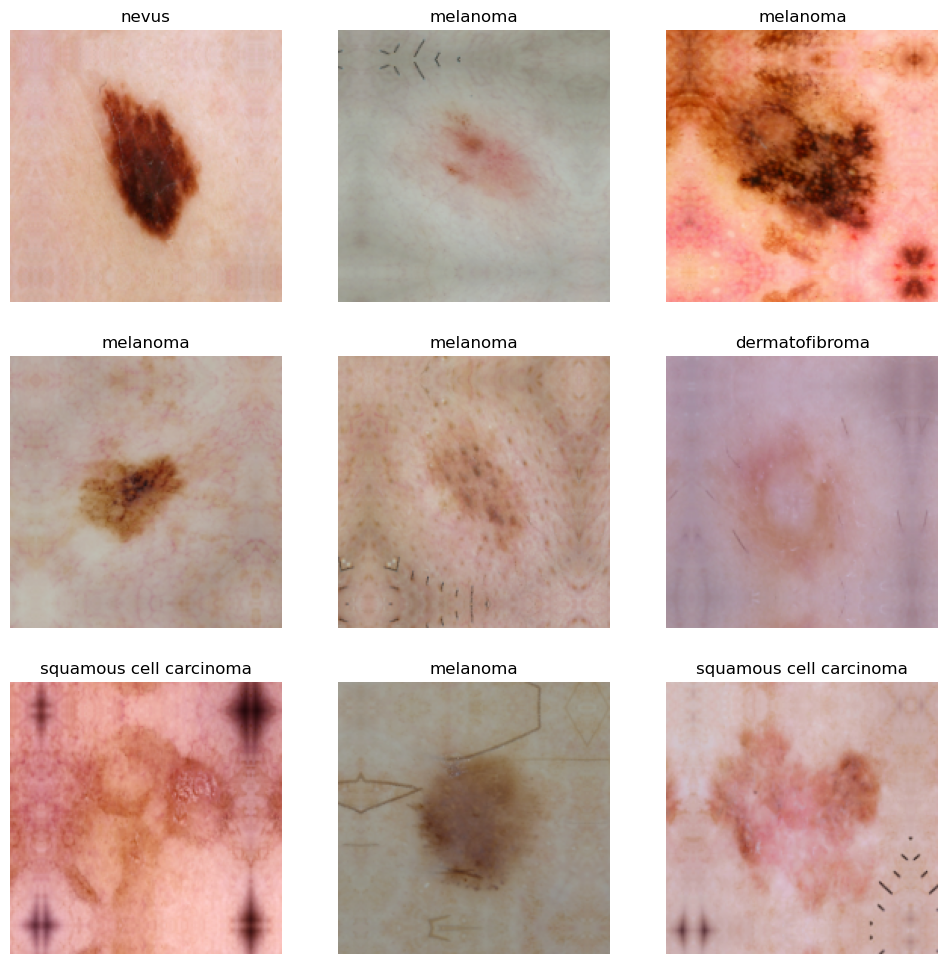

In [16]:
import matplotlib.pyplot as plt

# Visualize the augmentation strategy for one instance of training images
plt.figure(figsize=(12, 12))

# Take one batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    # Apply the data augmentation to the images
    augmented_images = data_augmentation(images)
    
    # Display the augmented images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))  # Convert tensor to uint8 format for display
        plt.title(class_names[labels[i]])  # Show the class name as the title
        plt.axis("off")  # Hide axes for better visualization

plt.show()  # Display the plot


Create the model, compile and train the model


In [17]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import Sequential

# Number of classes in the dataset
num_classes = 9

# Define the model architecture
model = Sequential([
    data_augmentation,  # Apply data augmentation
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize pixel values to [0, 1]

    # Convolutional layers with ReLU activation (without input_shape here)
    Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'),
    Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),  # Max pooling layer

    Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),  # Max pooling layer

    Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),  # Max pooling layer

    Dropout(0.25),  # Dropout layer to reduce overfitting

    # Flattening and dense output layer
    Flatten(),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])


Compile the model


In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Set from_logits to False
              metrics=['accuracy'])


Train the model


In [19]:
# Set the number of epochs for training
epochs = 30

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 342ms/step - accuracy: 0.1564 - loss: 2.2414 - val_accuracy: 0.2371 - val_loss: 2.0363
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 363ms/step - accuracy: 0.2088 - loss: 2.0254 - val_accuracy: 0.3065 - val_loss: 1.9933
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step - accuracy: 0.3035 - loss: 1.8986 - val_accuracy: 0.3490 - val_loss: 1.8037
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 329ms/step - accuracy: 0.3226 - loss: 1.8171 - val_accuracy: 0.3579 - val_loss: 1.7236
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 364ms/step - accuracy: 0.3800 - loss: 1.7206 - val_accuracy: 0.4183 - val_loss: 1.6266
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 367ms/step - accuracy: 0.4052 - loss: 1.6599 - val_accuracy: 0.4161 - val_loss: 1.5719
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - accuracy: 0.4312 - loss: 1.5880 - val_accuracy: 0.4183 - val_loss: 1.5866
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 359ms/step - accuracy: 0.4726 - loss: 1.5480 - val_accu

Visualize the results


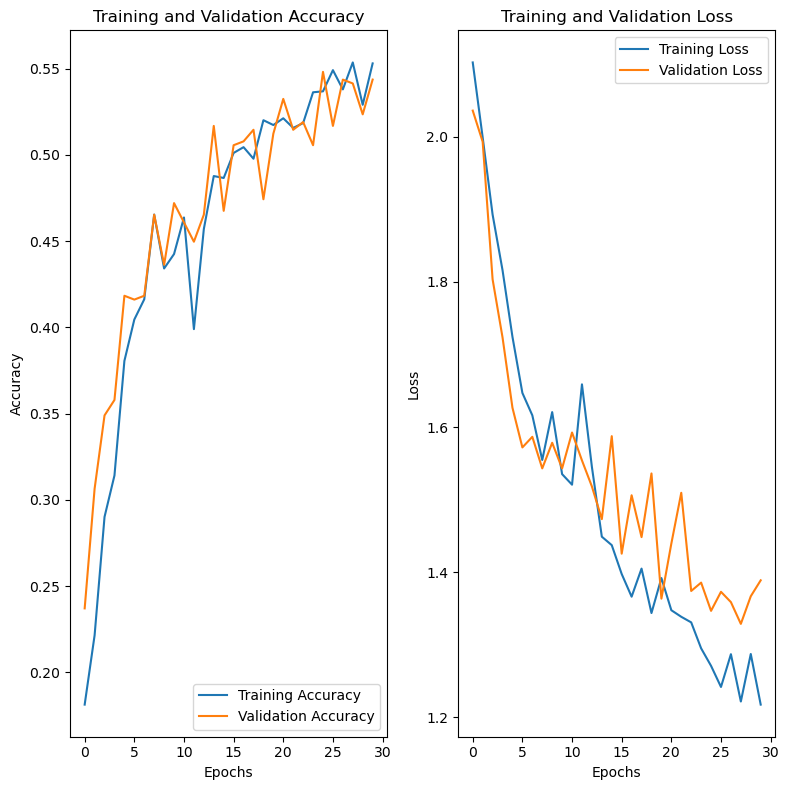

In [20]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs
epochs_range = range(epochs)

# Create a figure for the plots
plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # Add label for x-axis
plt.ylabel('Accuracy')  # Add label for y-axis

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  # Add label for x-axis
plt.ylabel('Loss')  # Add label for y-axis

# Show the plots
plt.tight_layout()  # Adjust layout for better fit
plt.show()


Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


Observations:

Training Accuracy: The training accuracy steadily increases throughout the epochs, reaching a relatively high level.
Validation Accuracy: The validation accuracy also increases, but at a slower rate than the training accuracy. There is a slight gap between the training and validation accuracy towards the later epochs.
Training Loss: The training loss decreases significantly over the epochs, indicating that the model is learning.
Validation Loss: The validation loss also decreases, but at a slower rate than the training loss. There is a slight increase in validation loss towards the later epochs.

Todo: Find the distribution of classes in the training dataset.

In many real-life datasets, class imbalance can occur, where one class has a disproportionately higher number of samples compared to others. This imbalance can negatively impact the quality of the final model. Therefore, as a sanity check, it is crucial to examine the distribution of classes in the dataset.

In [21]:
# Initialize empty lists to store image paths and labels
path_list = []
lesion_list = []

# Iterate through each class name
for class_name in class_names:
    # Iterate through all images in the class directory
    for image_path in train_data_path.glob(class_name + '/*.jpg'):
        path_list.append(str(image_path))  # Append the image path to the list
        lesion_list.append(class_name)      # Append the corresponding label to the list

# Create a dictionary from the lists
dataframe_dict_original = dict(zip(path_list, lesion_list))

# Convert the dictionary into a DataFrame
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])

# Display the DataFrame
original_df

,Path,Label
0,Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


In [22]:
# Create a dictionary mapping image paths to their corresponding labels
dataframe_dict_original = dict(zip(path_list, lesion_list))

# Convert the dictionary into a DataFrame with specified column names
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])

# Display the DataFrame
original_df


,Path,Label
0,Train\actinic keratosis\ISIC_0025780.jpg,actinic keratosis
1,Train\actinic keratosis\ISIC_0025803.jpg,actinic keratosis
2,Train\actinic keratosis\ISIC_0025825.jpg,actinic keratosis
3,Train\actinic keratosis\ISIC_0025953.jpg,actinic keratosis
4,Train\actinic keratosis\ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,Train\vascular lesion\ISIC_0033844.jpg,vascular lesion
2235,Train\vascular lesion\ISIC_0033969.jpg,vascular lesion
2236,Train\vascular lesion\ISIC_0033991.jpg,vascular lesion
2237,Train\vascular lesion\ISIC_0034196.jpg,vascular lesion


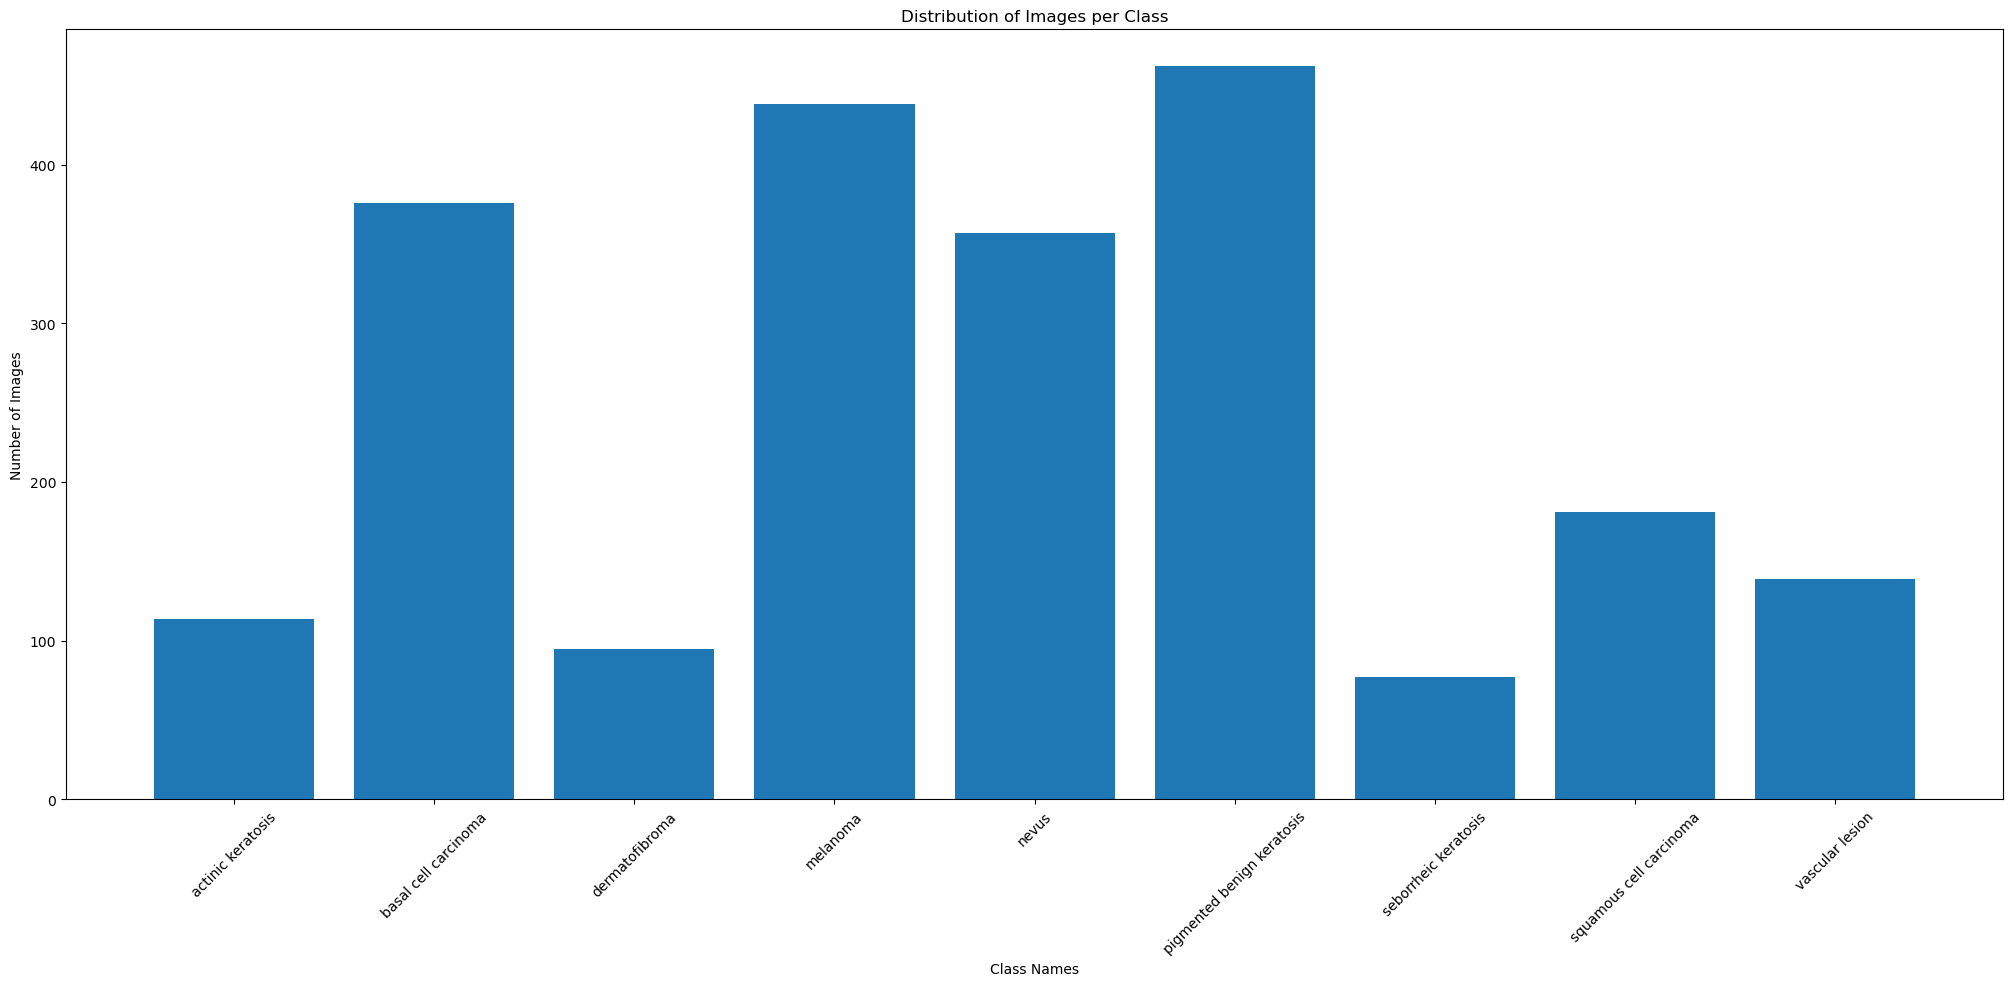

In [23]:
# Initialize a list to store the counts of images for each class
count = []

# Count the number of images in each class directory
for class_name in class_names:
    count.append(len(list(train_data_path.glob(class_name + '/*.jpg'))))

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(25, 10))
plt.bar(class_names, count)
plt.xlabel('Class Names')  # Add label for the x-axis
plt.ylabel('Number of Images')  # Add label for the y-axis
plt.title('Distribution of Images per Class')  # Add title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

Todo: Write your findings here:
- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?

**Answer 1:** Squamous cell carcinoma has the fewest samples.

**Answer 2:** Actinic keratosis and dermatofibroma have a similar number of samples. Similarly, melanoma and pigmented benign keratosis also have a comparable number of samples.

In [24]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Todo: Rectify the class imbalance

To use Augmentor, follow this general procedure:

Instantiate a Pipeline: Create a Pipeline object that points to the directory containing your initial image dataset.

Define Operations: Specify a series of operations to apply to the dataset using the Pipeline object.

Execute Operations: Call the sample() method of the Pipeline to execute the defined operations on the images.

In [25]:
# Specify the path to the training dataset
# path_to_training_dataset = "Train" 

import Augmentor

# Loop through each class name to create a pipeline for augmentation
for class_name in class_names:
    # Create a Pipeline object for the current class directory
    p = Augmentor.Pipeline("Train", save_format='jpg')
    
    # Define augmentation operations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # Sample 500 augmented images for the current class to ensure no class is sparse
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1631BDFD6D0>: 100%|██████████| 500/500 [00:05<00:00, 98.15 Samples/s]                     


Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x163AA1DD3D0>: 100%|██████████| 500/500 [00:04<00:00, 107.74 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x163A9AB9E90>: 100%|██████████| 500/500 [00:05<00:00, 97.03 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x163AA0F5CD0>: 100%|██████████| 500/500 [00:05<00:00, 87.35 Samples/s]                     


Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=722x545 at 0x163AA105890>: 100%|██████████| 500/500 [00:05<00:00, 95.42 Samples/s]   


Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x163AA104590>: 100%|██████████| 500/500 [00:05<00:00, 87.46 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x163A9B3E2D0>: 100%|██████████| 500/500 [00:05<00:00, 98.74 Samples/s]                     


Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x163AA2E2D50>: 100%|██████████| 500/500 [00:05<00:00, 94.70 Samples/s]                     


Initialised with 2239 image(s) found.
Output directory set to Train\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x163A9D23150>: 100%|██████████| 500/500 [00:05<00:00, 83.46 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each skin cancer type's sub-directory. Let's check the total count of augmented images.



In [26]:
import pathlib

# Specify the path to the directory containing augmented images
data_dir_train1 = pathlib.Path("Train/output")

# Count the total number of augmented images in the sub-directories
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))

# Print the total count of augmented images
print(image_count_train1)


4500


Model Building



In [27]:
# train dataset 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_data_path, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)


Found 6739 files belonging to 10 classes.
Using 5392 files for training.


In [28]:
# validation dataset 
val_ds =tf.keras.preprocessing.image_dataset_from_directory(train_data_path,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


Todo: Train the model on the data created using Augmentor


In [29]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.

#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
from tensorflow.keras import layers, Sequential

# Sequential allows you to create models layer-by-layer  
model = Sequential()

# Rescaling Layer
model.add(layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# First Convolution layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second Convolution Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Third Convolution Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout layer with 50% fraction of the input units to drop.
model.add(layers.Dropout(0.5))

# Flatten Layer
# Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(128, activation='relu'))

# Dropout layer with 25% fraction of the input units to drop.
model.add(layers.Dropout(0.25))

# Dense Layer with softmax activation function.
# Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names), activation='softmax'))

model.summary()

C:\Users\nithkuma\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0

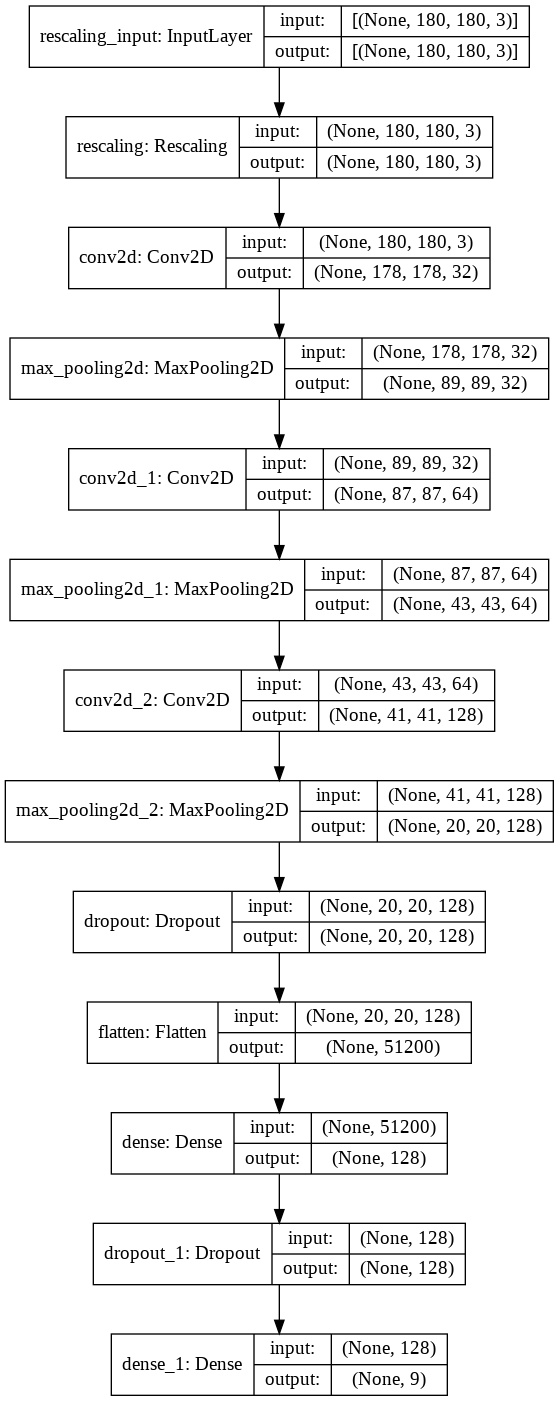

In [32]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
#Compile the Model

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [34]:
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
169/169 [==============================] - 69s 102ms/step - loss: 1.8030 - accuracy: 0.3166 - val_loss: 1.5269 - val_accuracy: 0.4321

Epoch 00001: val_accuracy improved from -inf to 0.43207, saving model to model.h5
Epoch 2/20
169/169 [==============================] - 12s 69ms/step - loss: 1.4552 - accuracy: 0.4518 - val_loss: 1.3301 - val_accuracy: 0.5308

Epoch 00002: val_accuracy improved from 0.43207 to 0.53081, saving model to model.h5
Epoch 3/20
169/169 [==============================] - 12s 69ms/step - loss: 1.3019 - accuracy: 0.5109 - val_loss: 1.2471 - val_accuracy: 0.5434

Epoch 00003: val_accuracy improved from 0.53081 to 0.54343, saving model to model.h5
Epoch 4/20
169/169 [==============================] - 12s 69ms/step - loss: 1.1884 - accuracy: 0.5555 - val_loss: 1.0393 - val_accuracy: 0.6288

Epoch 00004: val_accuracy improved from 0.54343 to 0.62880, saving model to model.h5
Epoch 5/20
169/169 [==============================] - 12s 69ms/step - loss: 1.0936

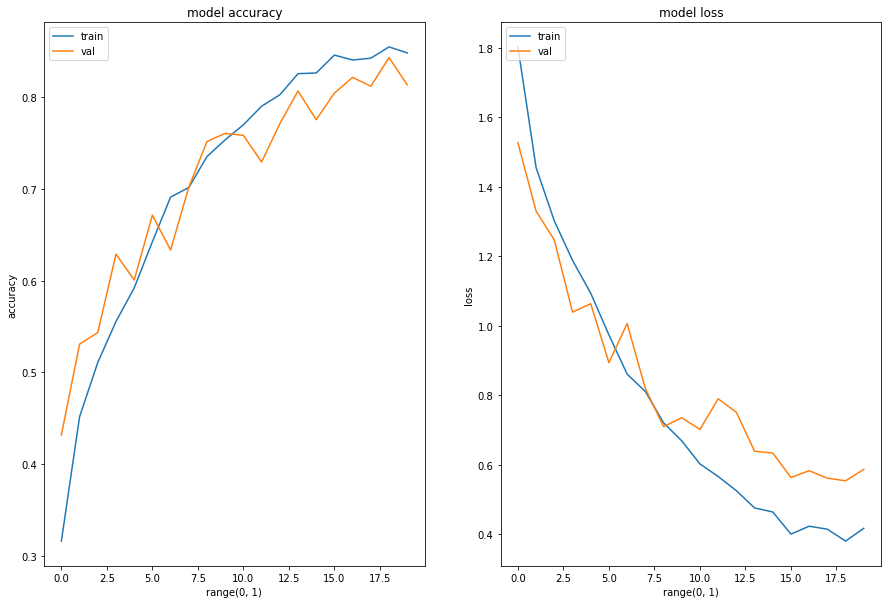

In [35]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


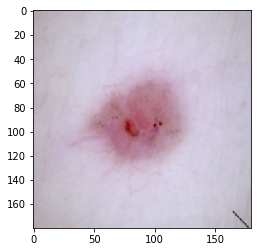

In [36]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

# Construct the path to the test images
test_image_path = os.path.join(test_image_dir, class_names[1], '*')

# Retrieve the list of test images
test_images = glob(test_image_path)

# Load the last test image and resize it
test_image = load_img(test_images[-1], target_size=(180, 180))

# Display the test image
plt.imshow(test_image)
plt.grid(False)

# Prepare the image for prediction
img = np.expand_dims(test_image, axis=0)

# Make a prediction using the model
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions)

# Get the class name of the predicted class
predicted_class = class_names[predicted_class_index]

print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+predicted_class )